##  Домашнее задание № 5: Пироги с глазами!

Задание присылать на обе почты почты aleksartamonov@gmail.com dashkov.alexander.om@gmail.com в виде ссылки на colab

В теме письма указать **CV_HSE_2021 HW5 <Фамилия Имя>**

soft deadline: 02.06.2021T23:59:00+0300

hard deadline: 09.06.2021T23:59:00+0300

### Пирамида лапласа
**(15 баллов)** Используя прием сшивки изображений с помощью пирамиды Лапласа, повторите прием с вашими глазами и вашими руками (или сделайте что-то похожее по смыслу)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from imgmorph import ImgMorph

In [2]:
def grid(array, ncols=3):  
    # https://stackoverflow.com/questions/42040747/more-idiomatic-way-to-display-images-in-a-grid-with-numpy
    nindex, height, width, intensity = array.shape
    nrows = nindex // ncols
    return (array.reshape(nrows, ncols, height, width, intensity).swapaxes(1,2).reshape(height*nrows, width*ncols, intensity))


def show(img, gray=False, size=3):
    plt.figure(figsize=(size, size))
    ax = plt.axes([0, 0, 1, 1], frameon=False)
    ax.set_axis_off()
    if gray:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)

In [3]:
def Laplacian_Pyramid_Blending_with_mask(A, B, m, num_levels = 6):
    # assume mask is float32 [0,1]

    # generate Gaussian pyramid for A,B and mask
    GA = A.copy()
    GB = B.copy()
    GM = m.copy()
    gpA = [GA]
    gpB = [GB]
    gpM = [GM]
    for i in range(num_levels):
        GA = cv2.pyrDown(GA)
        GB = cv2.pyrDown(GB)
        GM = cv2.pyrDown(GM)
        gpA.append(np.float32(GA))
        gpB.append(np.float32(GB))
        gpM.append(np.float32(GM))

    # generate Laplacian Pyramids for A,B and masks
    lpA  = [gpA[num_levels - 1]] # the bottom of the Lap-pyr holds the last (smallest) Gauss level
    lpB  = [gpB[num_levels - 1]]
    gpMr = [gpM[num_levels - 1]]
    for i in range(num_levels - 1, 0, -1):
        # Laplacian: subtarct upscaled version of lower level from current level
        # to get the high frequencies
        LA = np.subtract(gpA[i - 1], cv2.pyrUp(gpA[i]))
        LB = np.subtract(gpB[i - 1], cv2.pyrUp(gpB[i]))
        lpA.append(LA)
        lpB.append(LB)
        gpMr.append(gpM[i - 1]) # also reverse the masks

    # Now blend images according to mask in each level
    LS = []
    for la,lb,gm in zip(lpA,lpB,gpMr):
        ls = la * gm + lb * (1.0 - gm)
        LS.append(ls)

    # now reconstruct
    ls_ = LS[0]
    for i in range(1, num_levels):
        ls_ = cv2.pyrUp(ls_)
        ls_ = cv2.add(ls_, LS[i])

    return ls_

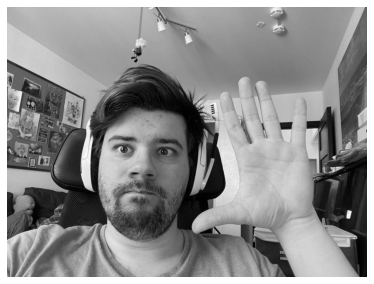

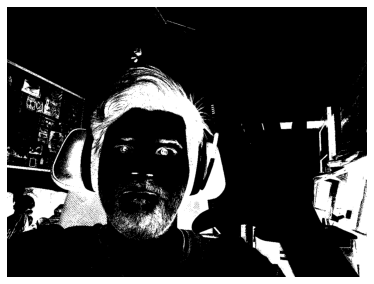

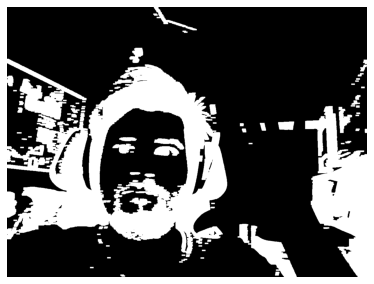

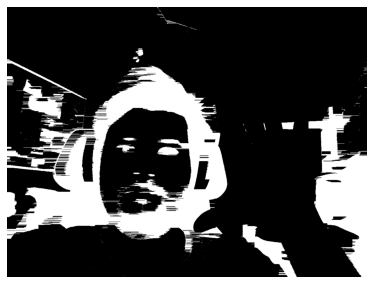

In [25]:
img = ImgMorph(cv2.imread("photo.jpg"))

img_gray = img.gray()
img_gray.picture

thresh = img_gray.threshold(t=50, kind=cv2.THRESH_BINARY_INV)
thresh.picture

thresh.dilate(np.ones((3, 7)), iterations=2).picture
thresh.close(np.ones((1, 6)), iterations=6).picture

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'morphologyEx'
> Overload resolution failed:
>  - morphologyEx() missing required argument 'kernel' (pos 3)
>  - morphologyEx() missing required argument 'kernel' (pos 3)


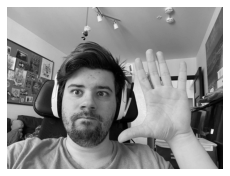

In [5]:
origin = cv2.imread("photo.jpg")
origin_rgb = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
origin_gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
show(origin_gray, gray=True)
thresh = cv2.morphologyEx(origin_gray, cv2.THRESH_BINARY)

show(thresh, True)

closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((1, 3)), iterations=5)

# closing[:200, :200] = 0
# closing[250:-1, 250:500] = 1

show(closing, True)
closing = cv2.morphologyEx(closing, cv2.MORPH_CLOSE, np.ones((10, 10)), iterations=3)

show(closing, True)

eye = origin_rgb.copy()
eye[closing == 0] = 0
show(eye)

In [ ]:


m = np.zeros_like(A, dtype='float32')
m[:,A.shape[1]/2:] = 1 # make the mask half-and-half
lpb = Laplacian_Pyramid_Blending_with_mask(A, B, m, 5)
cv2.imwrite("lpb.png",lpb)

AttributeError: 'NoneType' object has no attribute 'shape'

### Deep Image Prior
**(15 баллов)** Используя подход [Deep Image Prior](https://github.com/DmitryUlyanov/deep-image-prior) и его способность восстанавливать изображения, повторите прием с вашими глазами и вашими руками (или сделайте что-то похожее по смыслу)

In [ ]:
#Your code here